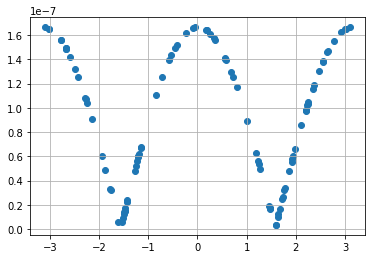

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import random
h = 0.001

random_x = [random.uniform(-np.pi, np.pi) for _ in range(100)]
all_errors = []
for x in random_x:
    approx = (np.sin( x + h ) - np.sin( x - h )) / (2 * h)
    error = np.abs(approx - np.cos( x ))
    all_errors.append( error )

plt.scatter(random_x,all_errors)
plt.yscale('log')
plt.grid()
plt.show()

In [3]:
%pip install git+https://github.com/chebpy/chebpy.git
%pip install autograd

  Cloning https://github.com/chebpy/chebpy.git to /tmp/pip-req-build-3t806f3g
  Running command git clone -q https://github.com/chebpy/chebpy.git /tmp/pip-req-build-3t806f3g
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for chebpy: filename=chebpy-0.4.3.3-py3-none-any.whl size=54630 sha256=0d7e5db419face32c3f3b2ba71f632df2aa07bbde02177772b94923ea4e9336f
  Stored in directory: /tmp/pip-ephem-wheel-cache-zlqs2c5a/wheels/31/6e/ce/d3a09a38c5c744791620e0fcaef3ea23b8d9c6712f3ea17fb2
Successfully built chebpy
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from autograd import grad

def rmse(predictions, targets):
    return np.sqrt(((np.array(predictions) - np.array(targets)) ** 2).mean())

import chebpy as cheb
def func(x):
    return 3*x**2 + 1/np.pi**2 * np.log((np.pi-x)**2) + 1

def func_sin100(x):
    for _ in range(100):
        x = np.sin(x)
    return x
import pdb
def chebyshev( function, interval, N=100 ):
    f = cheb.chebfun( function, interval, n=N )
    derivative = f.diff()
    # pdb.set_trace()
    plt.figure()
    derivative.plot(label='Chebyshev approx.')
    plt.grid()
    return derivative

def dual(fun, interval, N=100):
    x = np.linspace(interval[0], interval[1], N)
    deriv  = grad(fun) # Obtain gradient function
    plt.figure()
    plt.plot(x, list(map(deriv, x)), label='Autograd')
    plt.grid()
    return deriv

# cos = chebyshev( func_sin100, [-1,1] )

# cos.plot()
# plt.grid()



In [20]:
import time
def driver( method, function, interval, analytical, N=100 ):
    if method=='chebyshev':
        start = time.time()
        derivative = chebyshev( function, interval, N )
        end = time.time()
    elif method=='dual':
        start = time.time()
        derivative = dual( function, interval, N )
        end = time.time()
    else:
        print('Please choose a method \'chebyshev\' or \'dual\'')
    total_time = end - start
    x = np.linspace(interval[0],interval[1],N)
    # pdb.set_trace()
    plt.plot(x, analytical(x), label='analytical derivative', linestyle='dashed')
    plt.legend()
    plt.ylim([-3,3])
    RMSE = rmse(derivative(x), analytical(x))
    # RMSE = None
    print(f'For method {method}, function{function}:')
    print(f'The total time it took was {total_time}')
    print(f'The RMSE was {RMSE}')
    print(f'The derivative graph is below:')
    plt.show()





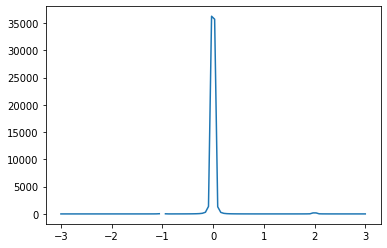

In [15]:
import numpy as np
import autograd.numpy as anp
# Define all the functions
def func1(x):
    return anp.sin(x)

def func2(x):
    return anp.sin(1/x)

def func3(x):
    return 3*x**2 + 1/anp.pi**2*anp.log((anp.pi-x)**2) + 1

def func4(x):
    for _ in range(100):
        x = anp.sin(x)
    return x

def func5_cheb(x):
    y = anp.zeros(anp.shape(x))
    for idx, x_val in enumerate(x):
        A = anp.array([[1,x_val],[2,x_val**2]])
        b = anp.array([1,1])
        y_vec = anp.linalg.solve(A,b)
        y[idx] = 1/anp.linalg.norm(y_vec,2)
    print(1/anp.linalg.norm(y))
    return y

def func1p(x):
    return np.cos(x)

def func2p(x):
    return -x**-2 * np.cos(1/x)

def func3p(x):
    return 6*x - 2/(np.pi-x)

def func4p(x):
    cos = np.cos
    sin = np.sin
    deriv = cos(x)
    for i in range(100):
        new_term = x
        for _ in range(i):
            new_term = sin(new_term)        
        deriv *= cos(new_term)
    return deriv

def func5p(x):
    deriv = np.zeros((2,len(x)))
    deriv[0,:] = -(2*x**3 - 3*x**2 - 4*x) / (x**4 - x**3 - 2*x**2)**2
    deriv[1,:] = -(6*x-6) / (3*x**2 - 6*x)**2
    return np.linalg.norm(deriv,2,axis=0)

x = np.linspace(-3,3,100)

deriv = func5p(x)
import matplotlib.pyplot as plt

plt.plot(x,deriv)
# plt.plot(x,func5p(x))

For method chebyshev, function<function func1 at 0x7fcf5f60cca0>:
The total time it took was 0.011849403381347656
The RMSE was 3.280816358084691e-14
The derivative graph is below: <chebfun-col,1,99>

For method chebyshev, function<function func2 at 0x7fcf5e6068b0>:
The total time it took was 0.010247230529785156
The RMSE was 65.61227133106867
The derivative graph is below: <chebfun-col,1,99>

For method chebyshev, function<function func3 at 0x7fcfd0369b80>:
The total time it took was 0.009462118148803711
The RMSE was 2821.3235193439427
The derivative graph is below: <chebfun-col,1,99>

For method chebyshev, function<function func4 at 0x7fcf861583a0>:
The total time it took was 0.00939178466796875
The RMSE was 0.0037355107444599247
The derivative graph is below: <chebfun-col,1,99>

0.10513418326107192
For method chebyshev, function<function func5_cheb at 0x7fcf86158430>:
The total time it took was 0.014802932739257812
The RMSE was inf
The derivative graph is below: <chebfun-col,1,99>



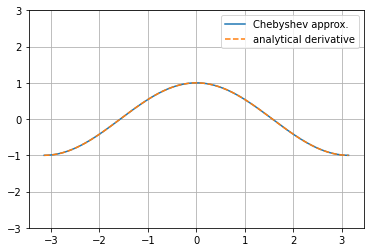

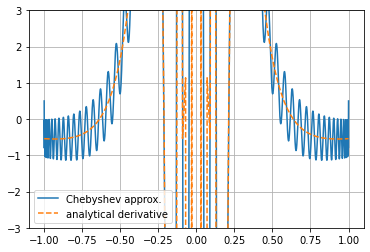

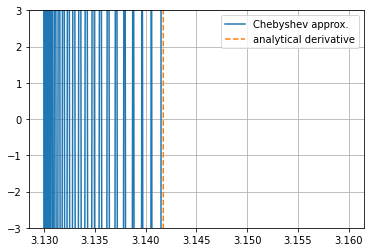

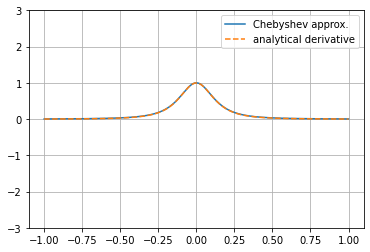

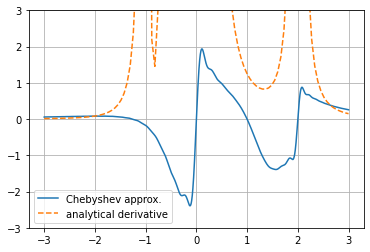

In [21]:
pi = np.pi
driver('chebyshev', func1, [-pi,pi], func1p)
driver('chebyshev', func2, [-1,1], func2p)
driver('chebyshev', func3, [3.13,3.16], func3p)
driver('chebyshev', func4, [-1,1], func4p)
driver('chebyshev', func5_cheb, [-3,3], func5p)


For method dual, function<function func1 at 0x7fcf5f697b80>:
The total time it took was 0.013820886611938477
The RMSE was None
The derivative graph is below: <function unary_to_nary.<locals>.nary_operator.<locals>.nary_f at 0x7fcf5f4b8dc0>
For method dual, function<function func2 at 0x7fcfd0369b80>:
The total time it took was 0.013912439346313477
The RMSE was None
The derivative graph is below: <function unary_to_nary.<locals>.nary_operator.<locals>.nary_f at 0x7fcf5f3dba60>
For method dual, function<function func3 at 0x7fcf861583a0>:
The total time it took was 0.02570343017578125
The RMSE was None
The derivative graph is below: <function unary_to_nary.<locals>.nary_operator.<locals>.nary_f at 0x7fcf5f327430>
For method dual, function<function func4 at 0x7fcf86158430>:
The total time it took was 0.09656119346618652
The RMSE was None
The derivative graph is below: <function unary_to_nary.<locals>.nary_operator.<locals>.nary_f at 0x7fcf5f365e50>
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
in

/home/byu.local/cedobbs/.local/lib/python3.8/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


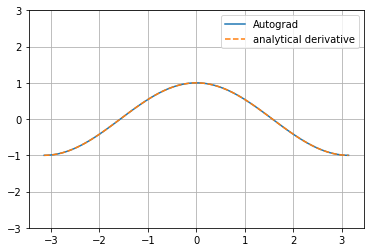

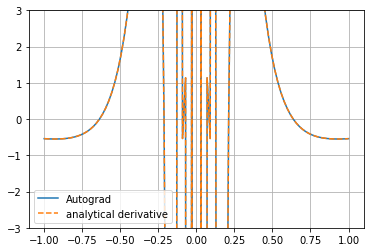

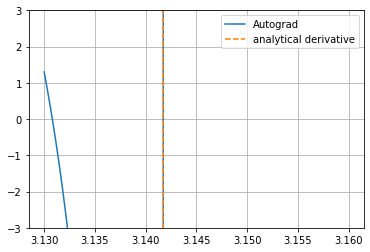

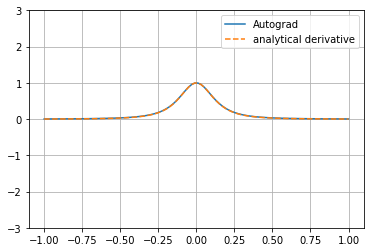

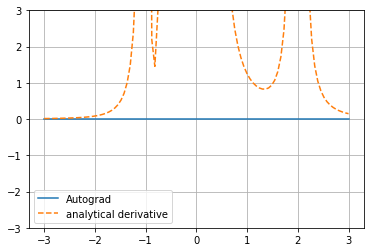

In [9]:
driver('dual', func1, [-pi,pi], func1p)
driver('dual', func2, [-1,1], func2p)
driver('dual', func3, [3.13,3.16], func3p)
driver('dual', func4, [-1,1], func4p)
driver('dual', func5, [-3,3], func5p)